
"""
Created on Sat Sep 27 2025
@author: Team 
"""

#===========================================================================
## EJEMPLO DE 10 TÉCNICAS DE REPROCESAMIENTO Y/O LIMPIEZA DE DATOS USANDO EL 
### DATASET MELB_DATA

##### Técnicas utilizadas:
##### 1. Eliminación de duplicados: Se eliminan los registros duplicados para evitar sesgos

##### 2. Imputación de valores faltantes: Se imputan los valores ausentes en las columnas BuildingArea, YearBuilt, Type, CouncilArea, Rooms, Car y Regionname

##### 3. Detección y manejo de valores atípicos: Se utilizan los límites del IQR para eliminar los outliers en la columna Landsize

##### 4. Normalización y estandarización: Se aplica el escalado estándar a las columnas 'Landsize', 'Price' para asegurar que los datos estén en la misma escala.

##### 5. Conversión de tipos de datos: Se convierte la columna sex a valores numéricos (0 y 1).

##### 6. Codificación de variables categóricas: Se aplica OneHotEncoding a las columna categóricas Method

##### 7.  Escalado de características: Ya aplicado previamente en los pasos anteriores.

##### 8. Corrección de errores tipográficos: En este dataset no hay errores tipográficos evidentes.

##### 9. Agrupación y discretización: No se agrupan variables en categorías discretas.

##### 10. Creación de nuevas características: Se crea la nueva variable PricePerRoom para calcular el precio por habitación.
#==============================================================================


In [2]:
# Carga de librerias necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r'melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
#1. Eliminación de duplicados
df.drop_duplicates(inplace=True)
print(df.head())


       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [5]:
#2.  Imputacion de valores faltantes, pero visualizamos valores antes de imputar

print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [6]:
# Verificacion de valores unicos de la columna antes de imputar

print("\nValores unicos antes de imputar BuildingArea:\n")
print(df['BuildingArea'].unique())

print("\nValores unicos antes de imputar YearBuilt:\n")
print(df['YearBuilt'].unique())



Valores unicos antes de imputar BuildingArea:

[         nan 7.900000e+01 1.500000e+02 1.420000e+02 2.100000e+02
 1.070000e+02 7.500000e+01 1.900000e+02 9.400000e+01 9.700000e+01
 1.100000e+02 1.050000e+02 7.300000e+01 1.350000e+02 2.700000e+01
 6.000000e+01 8.500000e+01 1.740000e+02 5.000000e+01 1.280000e+02
 1.800000e+01 1.240000e+02 9.100000e+01 8.200000e+01 8.100000e+01
 2.250000e+02 1.450000e+02 8.400000e+01 1.340000e+02 1.160000e+02
 8.600000e+01 1.270000e+02 1.860000e+02 9.000000e+01 1.330000e+02
 1.300000e+02 1.130000e+02 1.000000e+02 3.090000e+02 1.920000e+02
 1.260000e+02 1.010000e+02 1.020000e+02 7.600000e+01 1.460000e+02
 1.980000e+02 1.800000e+02 1.590000e+02 1.220000e+02 1.810000e+02
 9.800000e+01 8.300000e+01 1.470000e+02 2.540000e+02 1.230000e+02
 1.310000e+02 3.400000e+01 2.070000e+02 6.800000e+01 5.400000e+01
 2.630000e+02 2.030000e+02 1.650000e+02 1.400000e+02 1.120000e+02
 2.710000e+02 6.100000e+01 2.720000e+02 2.420000e+02 2.680000e+02
 1.250000e+02 1.200000e+02 2

In [7]:
# Aseguracion de que valores faltantes sean representados como np.nan

df['BuildingArea'] = df['BuildingArea'].replace({None: np.nan, 'nan': np.nan})
df['YearBuilt'] = df['YearBuilt'].replace({None: np.nan, 'nan': np.nan})
df['Type'] = df['Type'].replace({None: np.nan, 'nan': np.nan})
df['CouncilArea'] = df['CouncilArea'].replace({None: np.nan, 'nan': np.nan})
df['Rooms'] = df['Rooms'].replace({None: np.nan, 'nan': np.nan})
df['Car'] = df['Car'].replace({None: np.nan, 'nan': np.nan})
df['Regionname'] = df['Regionname'].replace({None: np.nan, 'nan': np.nan})

# Verificacion de valores unicos de la columna después de imputar BuildingArea 
print("\nValores unicos después de imputar BuildingArea:\n")
print(df['BuildingArea'].unique())

# Verificacion de valores unicos de la columna después de imputar YearBuilt
print("\nValores unicos después de imputar YearBuilt:\n")
print(df['YearBuilt'].unique())

# Verificacion de valores unicos de la columna después de imputar Type
print("\nValores unicos después de imputar Type:\n")
print(df['Type'].unique())

# Verificacion de valores unicos de la columna después de imputar CouncilArea
print("\nValores unicos después de imputar CouncilArea:\n")
print(df['CouncilArea'].unique())

# Verificacion de valores unicos de la columna después de imputar Rooms
print("\nValores unicos después de imputar Rooms:\n")
print(df['Rooms'].unique())

# Verificacion de valores unicos de la columna después de imputar Car
print("\nValores unicos después de imputar Car:\n")
print(df['Car'].unique())

# Verificacion de valores unicos de la columna después de imputar Regionname
print("\nValores unicos después de imputar Regionname:\n")
print(df['Regionname'].unique())



Valores unicos después de imputar BuildingArea:

[         nan 7.900000e+01 1.500000e+02 1.420000e+02 2.100000e+02
 1.070000e+02 7.500000e+01 1.900000e+02 9.400000e+01 9.700000e+01
 1.100000e+02 1.050000e+02 7.300000e+01 1.350000e+02 2.700000e+01
 6.000000e+01 8.500000e+01 1.740000e+02 5.000000e+01 1.280000e+02
 1.800000e+01 1.240000e+02 9.100000e+01 8.200000e+01 8.100000e+01
 2.250000e+02 1.450000e+02 8.400000e+01 1.340000e+02 1.160000e+02
 8.600000e+01 1.270000e+02 1.860000e+02 9.000000e+01 1.330000e+02
 1.300000e+02 1.130000e+02 1.000000e+02 3.090000e+02 1.920000e+02
 1.260000e+02 1.010000e+02 1.020000e+02 7.600000e+01 1.460000e+02
 1.980000e+02 1.800000e+02 1.590000e+02 1.220000e+02 1.810000e+02
 9.800000e+01 8.300000e+01 1.470000e+02 2.540000e+02 1.230000e+02
 1.310000e+02 3.400000e+01 2.070000e+02 6.800000e+01 5.400000e+01
 2.630000e+02 2.030000e+02 1.650000e+02 1.400000e+02 1.120000e+02
 2.710000e+02 6.100000e+01 2.720000e+02 2.420000e+02 2.680000e+02
 1.250000e+02 1.200000e+02

In [18]:
# Calculamos manualmente la moda de las columnas con datos faltantes
most_frequent_buildingArea_value = df['BuildingArea'].mode()[0]
most_frecuent_year_value = df['YearBuilt'].mode()[0]
most_frequent_type_value = df['Type'].mode()[0]
most_frequent_council_value = df['CouncilArea'].mode()[0]
most_frequent_rooms_value = df['Rooms'].mode()[0]
most_frequent_car_value = df['Car'].mode()[0]
most_frequent_region_value = df['Regionname'].mode()[0]

# Reemplalzamos los valores faltantes con la moda 
df['BuildingArea'].fillna(most_frequent_buildingArea_value, inplace=True)
df['YearBuilt'].fillna(most_frecuent_year_value, inplace=True)
df['Type'].fillna(most_frequent_type_value, inplace=True)
df['CouncilArea'].fillna(most_frequent_council_value, inplace=True)
df['Rooms'].fillna(most_frequent_rooms_value, inplace=True)
df['Car'].fillna(most_frequent_car_value, inplace=True)
df['Regionname'].fillna(most_frequent_region_value, inplace=True)

# Verificamos los valores unicos después de la imputación
print("\nValores unicos después de la imputación:\n")
print(df['BuildingArea'].unique())
print('\n')
print(df['YearBuilt'].unique())
print('\n')
print(df['Type'].unique())
print('\n')
print(df['CouncilArea'].unique())
print('\n')
print(df['Rooms'].unique())
print('\n')
print(df['Car'].unique())
print('\n')
print(df['Regionname'].unique())

print(df.head())



Valores unicos después de la imputación:

[2.7000e+01 1.2000e+02 1.4000e+01 5.1600e+02 8.0000e+01 6.9000e+01
 6.1800e+02 4.4900e+02 5.1800e+02 3.0500e+02 2.7200e+02 1.2600e+02
 1.2200e+02 5.9000e+01 6.2000e+01 4.7800e+02 1.0000e+02 8.5000e+01
 6.8000e+01 1.1500e+02 3.5580e+03 8.7000e+01 4.2000e+01 2.9500e+02
 1.6200e+02 1.1300e+02 7.1000e+01 8.1000e+01 9.4000e+01 6.3000e+01
 6.6000e+01 1.0300e+02 1.7500e+02 9.5000e+01 2.0400e+02 4.7000e+01
 3.2700e+02 1.1100e+02 1.6000e+02 1.9500e+02 5.0000e+01 1.3200e+02
 1.0200e+02 4.5000e+01 9.8000e+01 1.3000e+02 1.7000e+02 5.7000e+01
 7.6000e+01 5.3000e+01 5.6000e+01 6.4000e+01 6.7000e+01 7.0000e+01
 1.7600e+02 5.8000e+01 4.9000e+01 1.4100e+02 4.6000e+01 9.6000e+01
 9.2000e+01 4.0500e+02 6.5000e+01 7.2000e+01 4.3000e+01 1.1000e+02
 7.3000e+01 4.6430e+02 1.4300e+02 7.8000e+01 7.7500e+01 7.5000e+01
 5.4000e+01 6.1000e+01 9.9000e+01 8.4000e+01 7.9000e+01 1.1700e+02
 1.0500e+02 8.6500e+01 4.0954e+02 1.5200e+02 5.5000e+01 1.0600e+02
 3.1000e+02 9.5880e

/var/folders/l0/fyp45ck9745dkm7_fq7bw2sc0000gn/T/ipykernel_65391/77247332.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BuildingArea'].fillna(most_frequent_buildingArea_value, inplace=True)
/var/folders/l0/fyp45ck9745dkm7_fq7bw2sc0000gn/T/ipykernel_65391/77247332.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

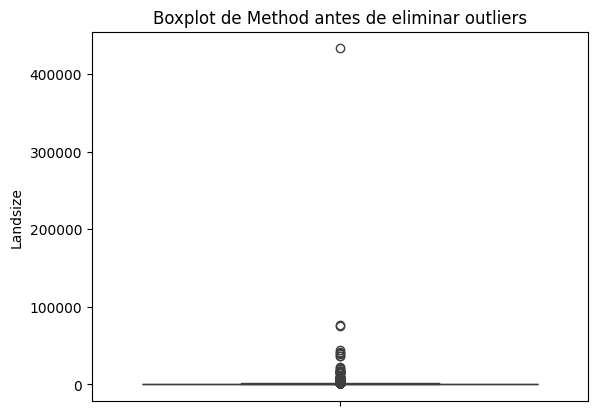

In [9]:
#3. Detección y manejo de valores atípicos
# Visualizamos los valores atípicos en la variable 'Method' (Metodo de venta)
sns.boxplot(df['Landsize'])
plt.title('Boxplot de Method antes de eliminar outliers')
plt.show()

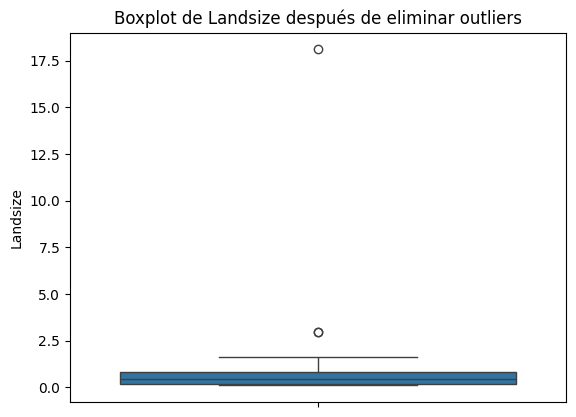

In [19]:
# Utilizamos el metodo de rango intercuartilico (IQR) para detectar outliers
Q1 = df['Landsize'].quantile(0.25)
Q3 = df['Landsize'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificamos los outliers
df = df[(df['Landsize'] < lower_bound) | (df['Landsize'] > upper_bound)]

# Visualizamos los valores atípicos despues de eliminar los outliers
sns.boxplot(df['Landsize'])
plt.title('Boxplot de Landsize después de eliminar outliers')
plt.show()


In [11]:
#4. Normalizacion y estandarizacion de datos
# Normalizamos las columnas 'Landsize' y 'Price'
scaler = StandardScaler()
df[['Landsize', 'Price']] = scaler.fit_transform(df[['Landsize', 'Price']])

print("\nValores después de la normalización y estandarización:\n")
print(df[['Landsize', 'Price', 'YearBuilt', 'CouncilArea']].head())


Valores después de la normalización y estandarización:

     Landsize     Price  YearBuilt  CouncilArea
22  -0.060296  0.141200     1970.0        Yarra
234 -0.175045  2.242359     1934.0  Stonnington
236 -0.152510 -0.249330     1970.0  Stonnington
251 -0.178857  5.020069     1935.0  Stonnington
266 -0.137346 -0.276832     1970.0  Stonnington


In [ ]:
#5. Conversi´n de  tipos de datos
# Convertimos la columna 'Method' a datos categoricos (0,1,2,3,4)

df['Method'] = df['Method'].map({ 'VB': 0, 'S': 1, 'SP': 2, 'PI': 3, 'SA': 4 })

print(df['Method'].unique(), '\n')

print("Valores únicos después de la conversión:\n", df.head()) 

[1 0 3 2 4] 

Valores únicos después de la conversión:
          Suburb              Address  Rooms Type     Price  Method   SellerG  \
22   Abbotsford  138/56 Nicholson St      3    u  0.141200       1    Jellis   
234    Armadale        526 Orrong Rd      4    h  2.242359       0    Jellis   
236    Armadale       9/19 Mercer Rd      3    u -0.249330       3  Marshall   
251    Armadale     367 Dandenong Rd      6    h  5.020069       1  Marshall   
266    Armadale    10/51 Armadale St      2    u -0.276832       1    Jellis   

           Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
22   18/03/2017       2.5    3067.0  ...       2.0  2.0 -0.060296   
234   4/06/2016       6.3    3143.0  ...       2.0  2.0 -0.175045   
236   7/05/2016       6.3    3143.0  ...       2.0  1.0 -0.152510   
251  17/09/2016       6.3    3143.0  ...       3.0  4.0 -0.178857   
266  25/02/2017       6.3    3143.0  ...       1.0  1.0 -0.137346   

     BuildingArea  YearBuilt  CouncilArea Lattit

In [13]:
#6. Codificación de variables categóricas
# Convertimos la columna 'Method' usando OneHotEncoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder_vars = pd.DataFrame(encoder.fit_transform(df[['Method']]), columns=encoder.get_feature_names_out())

# Añadimos las nuevas variables codificadas y eliminamos las originales
df = pd.concat([df, encoder_vars], axis=1)
df.drop(['Method'], axis=1, inplace=True)

# 7. Escalado de características
# Ya aplicamos el escalado de 'method'.

print("Valores únicos después de la conversión:\n", df.head()) 

Valores únicos después de la conversión:
          Suburb              Address  Rooms Type     Price   SellerG  \
22   Abbotsford  138/56 Nicholson St    3.0    u  0.141200    Jellis   
234    Armadale        526 Orrong Rd    4.0    h  2.242359    Jellis   
236    Armadale       9/19 Mercer Rd    3.0    u -0.249330  Marshall   
251    Armadale     367 Dandenong Rd    6.0    h  5.020069  Marshall   
266    Armadale    10/51 Armadale St    2.0    u -0.276832    Jellis   

           Date  Distance  Postcode  Bedroom2  ...  YearBuilt  CouncilArea  \
22   18/03/2017       2.5    3067.0       3.0  ...     1970.0        Yarra   
234   4/06/2016       6.3    3143.0       4.0  ...     1934.0  Stonnington   
236   7/05/2016       6.3    3143.0       3.0  ...     1970.0  Stonnington   
251  17/09/2016       6.3    3143.0       5.0  ...     1935.0  Stonnington   
266  25/02/2017       6.3    3143.0       2.0  ...     1970.0  Stonnington   

     Lattitude  Longtitude             Regionname Proper

In [14]:
# 8. Detección y corrección de errores tipográficos
# En este dataset no hay errores tipográficos evidentes, pero aplicamos una búsqueda simulada
# Supongamos que tenemos errores tipográficos en la columna Suburb, Address y los corregimos
df['Suburb'] = df['Suburb'].replace({'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D', 'E': 'E', 'F': 'F', 'G': 'G', 'T': 'T'})
df['Address'] = df['Address'].replace({'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D', 'E': 'E', 'F': 'F', 'G': 'G', 'T': 'T'})
# Este paso es un ejemplo ficticio de corrección de errores tipográficos en los datos categóricos.

print(df.head())

         Suburb              Address  Rooms Type     Price   SellerG  \
22   Abbotsford  138/56 Nicholson St    3.0    u  0.141200    Jellis   
234    Armadale        526 Orrong Rd    4.0    h  2.242359    Jellis   
236    Armadale       9/19 Mercer Rd    3.0    u -0.249330  Marshall   
251    Armadale     367 Dandenong Rd    6.0    h  5.020069  Marshall   
266    Armadale    10/51 Armadale St    2.0    u -0.276832    Jellis   

           Date  Distance  Postcode  Bedroom2  ...  YearBuilt  CouncilArea  \
22   18/03/2017       2.5    3067.0       3.0  ...     1970.0        Yarra   
234   4/06/2016       6.3    3143.0       4.0  ...     1934.0  Stonnington   
236   7/05/2016       6.3    3143.0       3.0  ...     1970.0  Stonnington   
251  17/09/2016       6.3    3143.0       5.0  ...     1935.0  Stonnington   
266  25/02/2017       6.3    3143.0       2.0  ...     1970.0  Stonnington   

     Lattitude  Longtitude             Regionname Propertycount  Method_1  \
22    -37.8078    144

In [15]:
#9. Simulacion de Agrupacion y discretación de variables ya que este data set no cuenta con una variable que podamos agrupar    
# Discretamos la columna 'Rooms' en categorias ('Chico', 'Semi mediano' 'Medio', 'Semi grande', 'Grande', 'Muy grande', 'Extra grande')

#df['Rooms'] = pd.cut(df['Rooms'], bins=[-np.inf, -1, 8, np.inf],, labels=['Chico', 'Semi mediano', 'Medio', 'Semi grande', 'Grande', 'Muy grande', 'Extra grande'])

print(df.head())


         Suburb              Address  Rooms Type     Price   SellerG  \
22   Abbotsford  138/56 Nicholson St    3.0    u  0.141200    Jellis   
234    Armadale        526 Orrong Rd    4.0    h  2.242359    Jellis   
236    Armadale       9/19 Mercer Rd    3.0    u -0.249330  Marshall   
251    Armadale     367 Dandenong Rd    6.0    h  5.020069  Marshall   
266    Armadale    10/51 Armadale St    2.0    u -0.276832    Jellis   

           Date  Distance  Postcode  Bedroom2  ...  YearBuilt  CouncilArea  \
22   18/03/2017       2.5    3067.0       3.0  ...     1970.0        Yarra   
234   4/06/2016       6.3    3143.0       4.0  ...     1934.0  Stonnington   
236   7/05/2016       6.3    3143.0       3.0  ...     1970.0  Stonnington   
251  17/09/2016       6.3    3143.0       5.0  ...     1935.0  Stonnington   
266  25/02/2017       6.3    3143.0       2.0  ...     1970.0  Stonnington   

     Lattitude  Longtitude             Regionname Propertycount  Method_1  \
22    -37.8078    144

In [16]:
# 10, Creacion de nuevas caracteristicas
# Creamos una nueva caracteristica 'PricePerRoom' que es el precio por habitacion
df['PricePerRoom'] = df['Price'].astype(float) / df['Rooms'].astype(float)

print(df.head())

         Suburb              Address  Rooms Type     Price   SellerG  \
22   Abbotsford  138/56 Nicholson St    3.0    u  0.141200    Jellis   
234    Armadale        526 Orrong Rd    4.0    h  2.242359    Jellis   
236    Armadale       9/19 Mercer Rd    3.0    u -0.249330  Marshall   
251    Armadale     367 Dandenong Rd    6.0    h  5.020069  Marshall   
266    Armadale    10/51 Armadale St    2.0    u -0.276832    Jellis   

           Date  Distance  Postcode  Bedroom2  ...  CouncilArea  Lattitude  \
22   18/03/2017       2.5    3067.0       3.0  ...        Yarra   -37.8078   
234   4/06/2016       6.3    3143.0       4.0  ...  Stonnington   -37.8580   
236   7/05/2016       6.3    3143.0       3.0  ...  Stonnington   -37.8543   
251  17/09/2016       6.3    3143.0       5.0  ...  Stonnington   -37.8602   
266  25/02/2017       6.3    3143.0       2.0  ...  Stonnington   -37.8573   

     Longtitude             Regionname  Propertycount Method_1  Method_2  \
22     144.9965  North